import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
store_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/stores.csv')
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
store_data['Type'].value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64

In [7]:
features_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/features.csv')
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
train_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/train.csv')
test_data =  pd.read_csv('C:/Users/Desktop/SGH/Project/walmart_data/test.csv')

In [10]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [12]:
train_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [13]:
test_data.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

#### now for analysing the data we need to merge feature_data with store_date
#### and merged feature_data with train and test data

In [14]:
merged_feature = features_data.merge(store_data , how = 'left' , on = 'Store')
merged_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [15]:
merged_feature.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [16]:
train_data.IsHoliday.value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [17]:
def merging_data(data):
    merged_date = data.merge(merged_feature , how = 'left' , on = ['Store','Date','IsHoliday'])
    return merged_date

def converting_to_numbers(data):
    data['IsHoliday'] = data['IsHoliday'].map({False: 0 , True:1}).astype('int')
    return data

def replace_nan(data):
    data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].replace({np.nan: 0}).astype('int')
    return data

In [18]:
merged_train , merged_test = merging_data(train_data) , merging_data(test_data)

In [19]:
merged_train , merged_test = converting_to_numbers(merged_train) ,converting_to_numbers(merged_test)

In [20]:
merged_train.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [21]:
merged_train , merged_test = replace_nan(merged_train) , replace_nan(merged_test)

In [22]:
merged_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [23]:
merged_train[['Date','IsHoliday']].head()

,Date,IsHoliday
0,2010-02-05,0
1,2010-02-12,1
2,2010-02-19,0
3,2010-02-26,0
4,2010-03-05,0


In [24]:
merged_train.loc[merged_train['Date'].between('2012-02-06', '2012-03-01') & (merged_train['IsHoliday'] == 0)].sort_values(by='Date', ascending=True).head(20)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
106,1,1,2012-02-17,54060.10,0,45.32,3.510,9873,11062,9,8409,3402,220.425759,7.348,A,151315
335579,35,36,2012-02-17,4872.34,0,37.24,3.695,20207,7982,2,9522,10733,141.214036,8.744,B,103681
173912,18,55,2012-02-17,12374.59,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
174055,18,56,2012-02-17,839.57,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
335436,35,35,2012-02-17,2136.96,0,37.24,3.695,20207,7982,2,9522,10733,141.214036,8.744,B,103681
174198,18,58,2012-02-17,200.00,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
174341,18,59,2012-02-17,286.87,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
335293,35,34,2012-02-17,17826.59,0,37.24,3.695,20207,7982,2,9522,10733,141.214036,8.744,B,103681
174448,18,60,2012-02-17,167.20,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653
174591,18,67,2012-02-17,15644.99,0,32.87,3.703,17875,9663,2,10433,5439,137.258310,8.075,B,120653


In [25]:
merged_train['Date'].dtype

dtype('O')

In [26]:
def date_information(df):
    df['Date_time'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date_time'].dt.day.astype('int')
    df['Month'] = df['Date_time'].dt.month.astype('int')
    df['Year'] = df['Date_time'].dt.year.astype('int')
    df['WeekOfYear'] = df['Date_time'].dt.isocalendar().week.astype('int')
    df['Quarter'] = df['Date_time'].dt.quarter.astype('int')
    df = df.drop(columns = ['Date_time'])
    return df

def converting_mardowns(df):
    df['MarkDown'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']
    df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
    return df

In [27]:
merged_train , merged_test = date_information(merged_train) , date_information(merged_test)
merged_train , merged_test = converting_mardowns(merged_train) , converting_mardowns(merged_test)

In [28]:
merged_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Month,Year,WeekOfYear,Quarter,MarkDown
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,5,2,2010,5,1,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,12,2,2010,6,1,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,19,2,2010,7,1,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,26,2,2010,8,1,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,5,3,2010,9,1,0


In [29]:
merged_train[merged_train.Weekly_Sales < 0].shape

(1285, 17)

In [30]:
merged_train = merged_train[merged_train.Weekly_Sales > 0]

In [31]:
merged_train[merged_train.Weekly_Sales < 0].shape

(0, 17)

In [32]:
merged_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Month,Year,WeekOfYear,Quarter,MarkDown
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,5,2,2010,5,1,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,12,2,2010,6,1,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,19,2,2010,7,1,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,26,2,2010,8,1,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,5,3,2010,9,1,0


In [33]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  int32  
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   CPI           420212 non-null  float64
 8   Unemployment  420212 non-null  float64
 9   Type          420212 non-null  object 
 10  Size          420212 non-null  int64  
 11  Day           420212 non-null  int32  
 12  Month         420212 non-null  int32  
 13  Year          420212 non-null  int32  
 14  WeekOfYear    420212 non-null  int32  
 15  Quarter       420212 non-null  int32  
 16  MarkDown      420212 non-null  int32  
dtypes: float64(5), int32(7), int64(3), object(2)
memory u

In [38]:
def isholiday(df):
    
    holiday_weeks = [1, 3, 6, 8, 22, 27, 36, 41, 46, 47, 52]
    df.loc[df['WeekOfYear'].isin(holiday_weeks), 'IsHoliday'] = 1
    
    return df

In [40]:
train__data, test__data = isholiday(merged_train), isholiday(merged_test)

<Axes: >

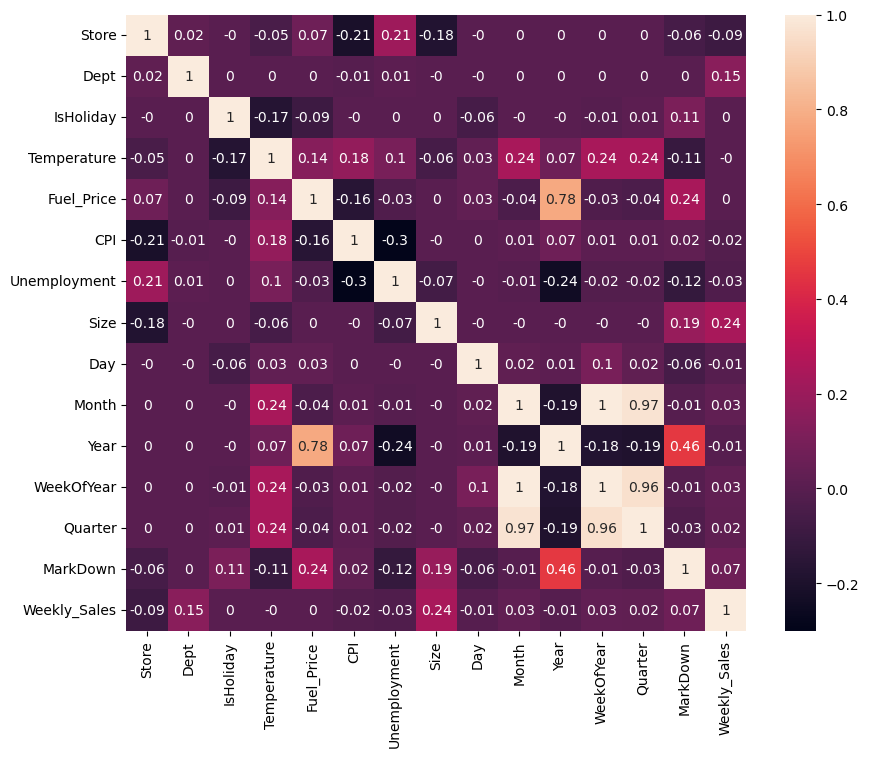

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
numeric_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Day', 'Month','Year', 'WeekOfYear', 'Quarter', 'MarkDown','Weekly_Sales']
sn.heatmap(merged_train[numeric_cols].corr().round(decimals=2), annot = True)

In [42]:
import seaborn as sns

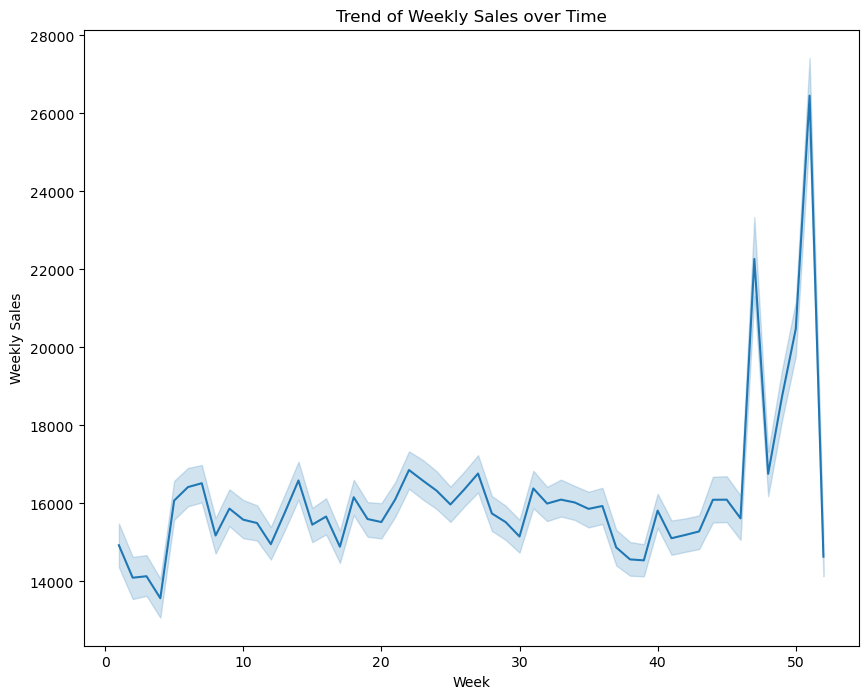

In [43]:
sns.lineplot(data=train__data, x='WeekOfYear', y='Weekly_Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Trend of Weekly Sales over Time')
plt.show()

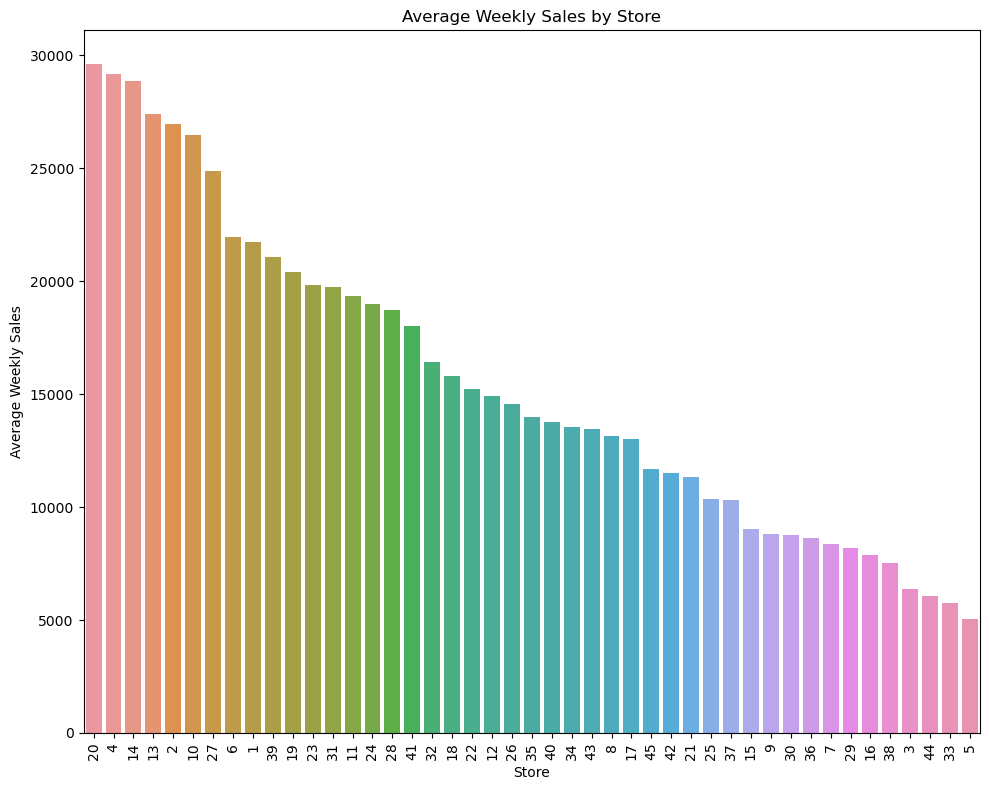

In [44]:
avg_sales_by_store = train__data.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_store, x='Store', y='Weekly_Sales', 
            order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

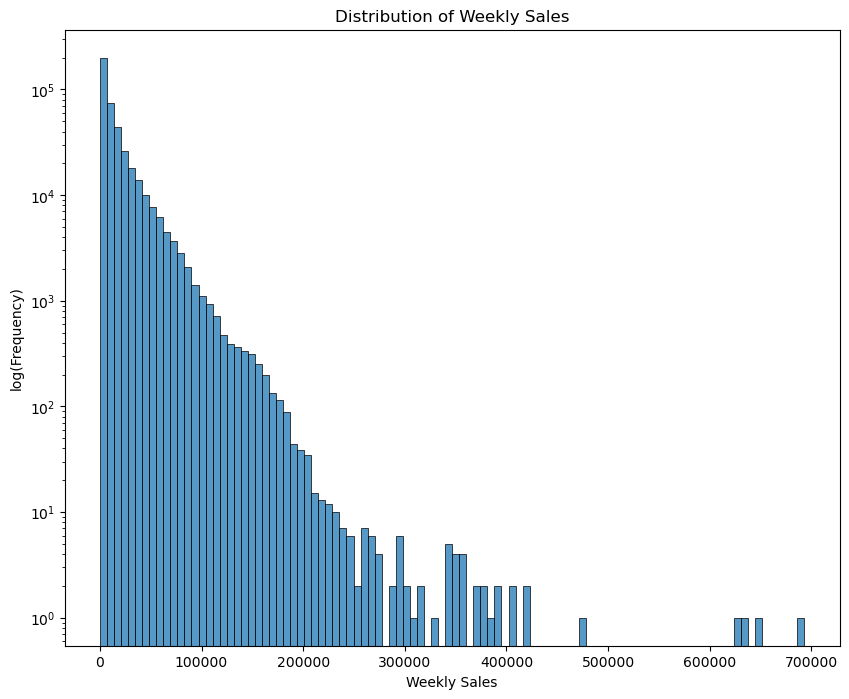

In [46]:
sns.histplot(data=train__data, x='Weekly_Sales', bins=100)
plt.xlabel('Weekly Sales')
plt.ylabel('log(Frequency)')
plt.yscale('log')
plt.title('Distribution of Weekly Sales')
plt.show()

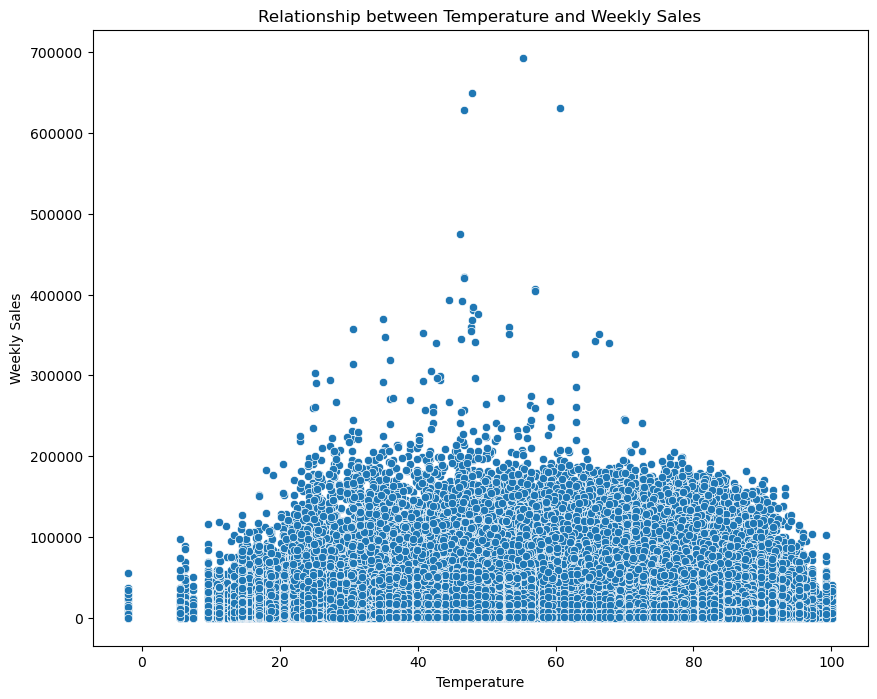

In [48]:
sns.scatterplot(data=train__data, x='Temperature', y='Weekly_Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Relationship between Temperature and Weekly Sales')
plt.show()

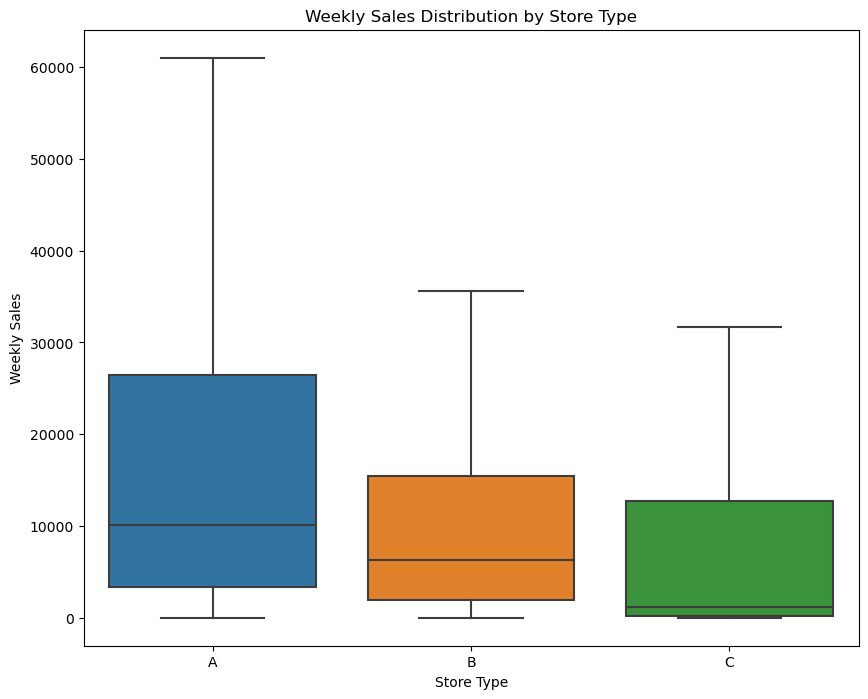

In [50]:
sns.boxplot(data=train__data, x='Type', y='Weekly_Sales',showfliers = False)
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Store Type')
plt.show()

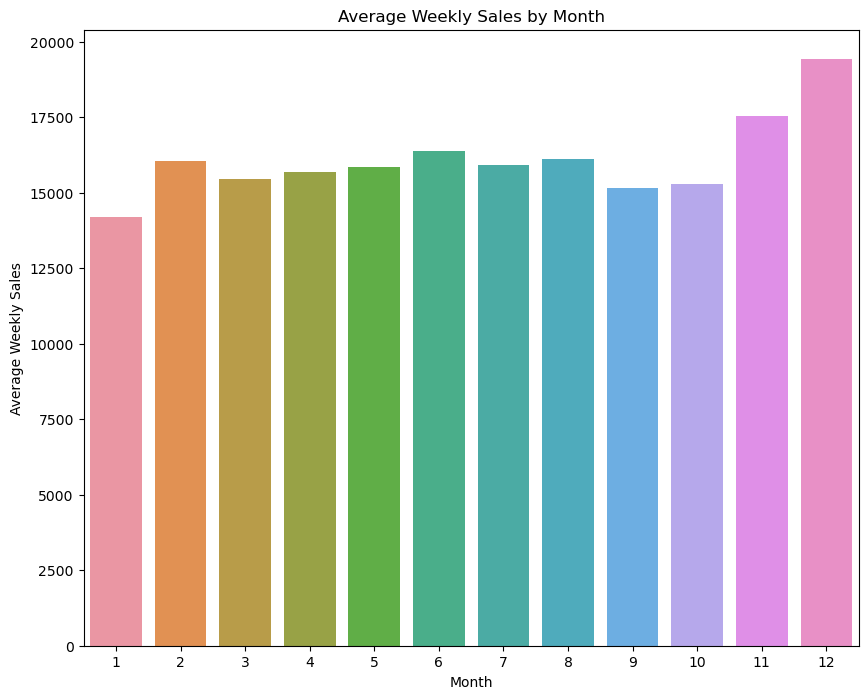

In [51]:
avg_sales_by_month = train__data.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_month, x='Month', y='Weekly_Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month')
plt.show()

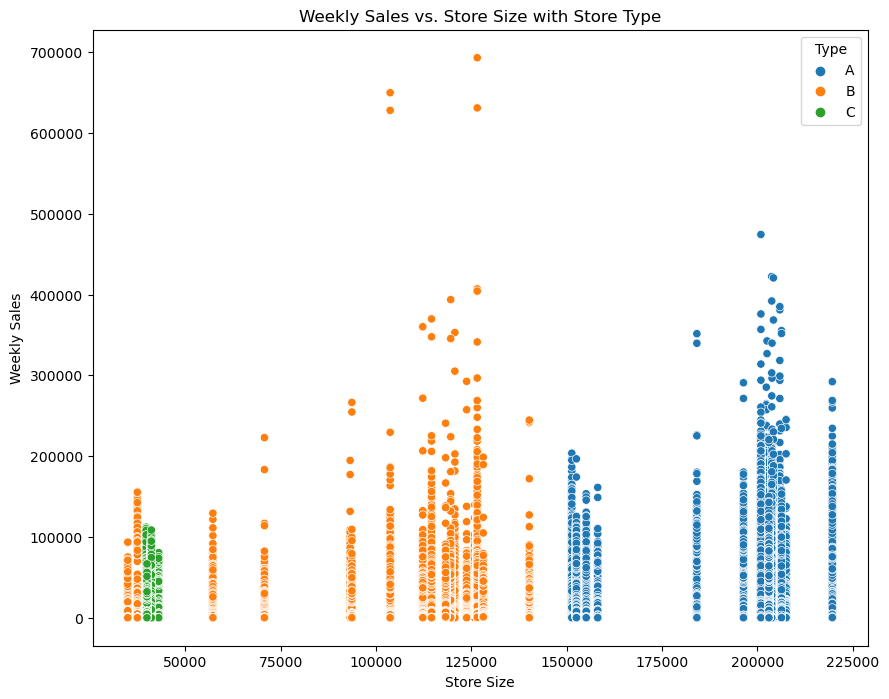

In [52]:
sns.scatterplot(data=train__data, x='Size', y='Weekly_Sales', hue='Type')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Store Size with Store Type')
plt.show()

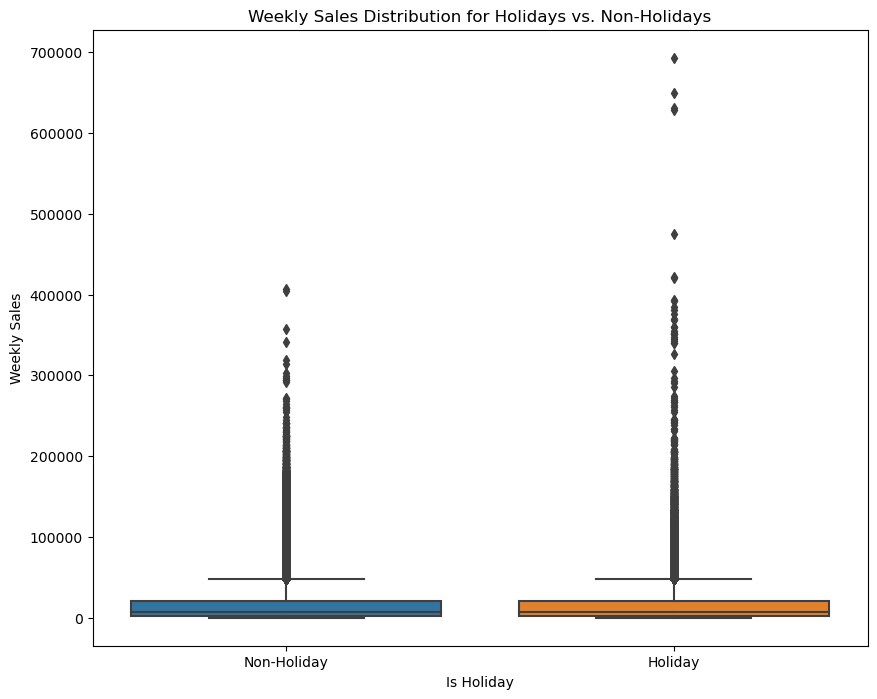

In [53]:
sns.boxplot(data=train__data, x='IsHoliday', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

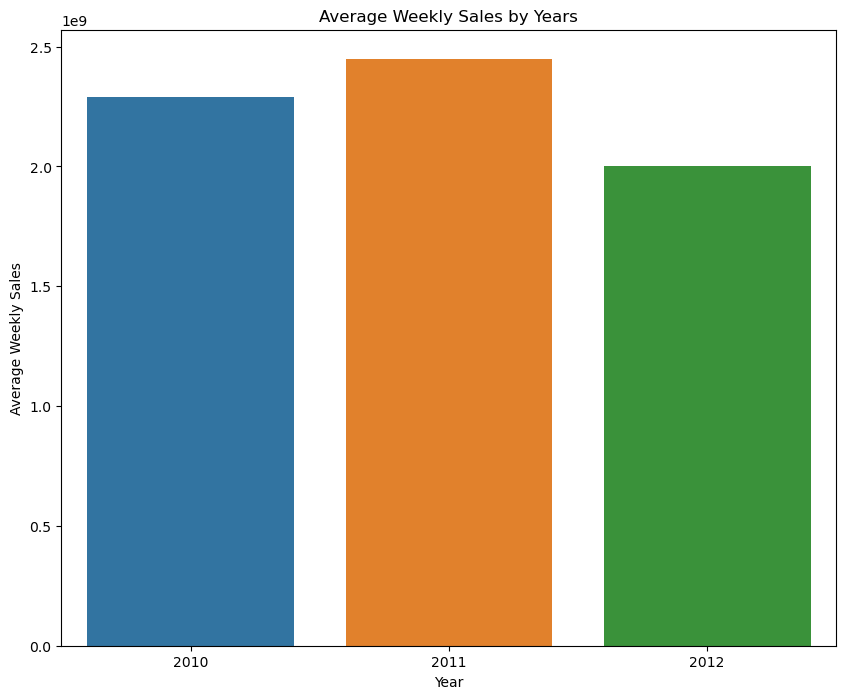

In [54]:
avg_sales_by_year = train__data.groupby('Year')['Weekly_Sales'].sum().reset_index()
# Plot the average weekly sales by years
sns.barplot(data=avg_sales_by_year, x='Year', y='Weekly_Sales')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Years')
plt.show()

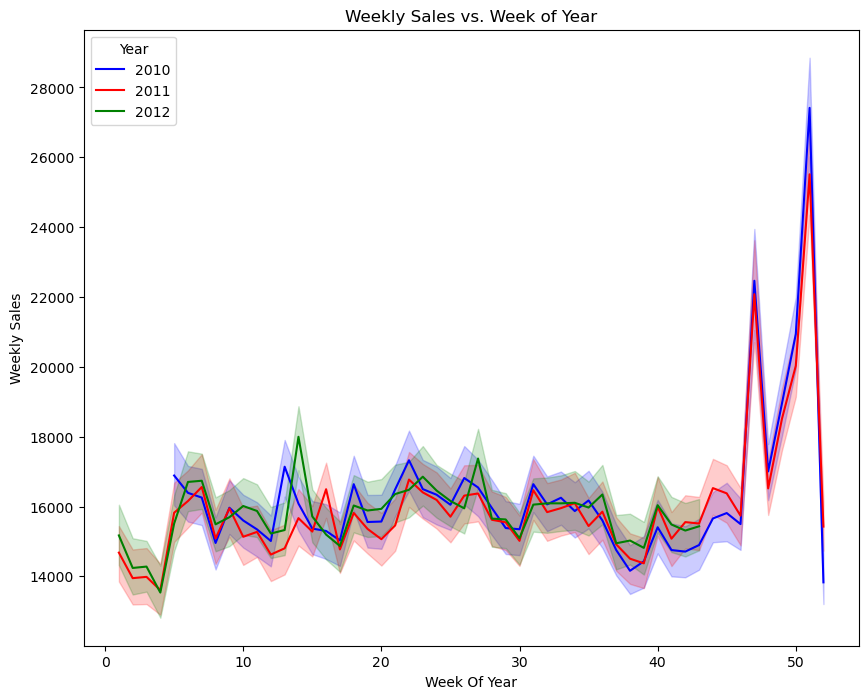

In [55]:
sns.lineplot(train__data, x = 'WeekOfYear', y = 'Weekly_Sales', hue = 'Year', palette = ['blue', 'red', 'green'])
plt.xlabel('Week Of Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Week of Year')
plt.show()

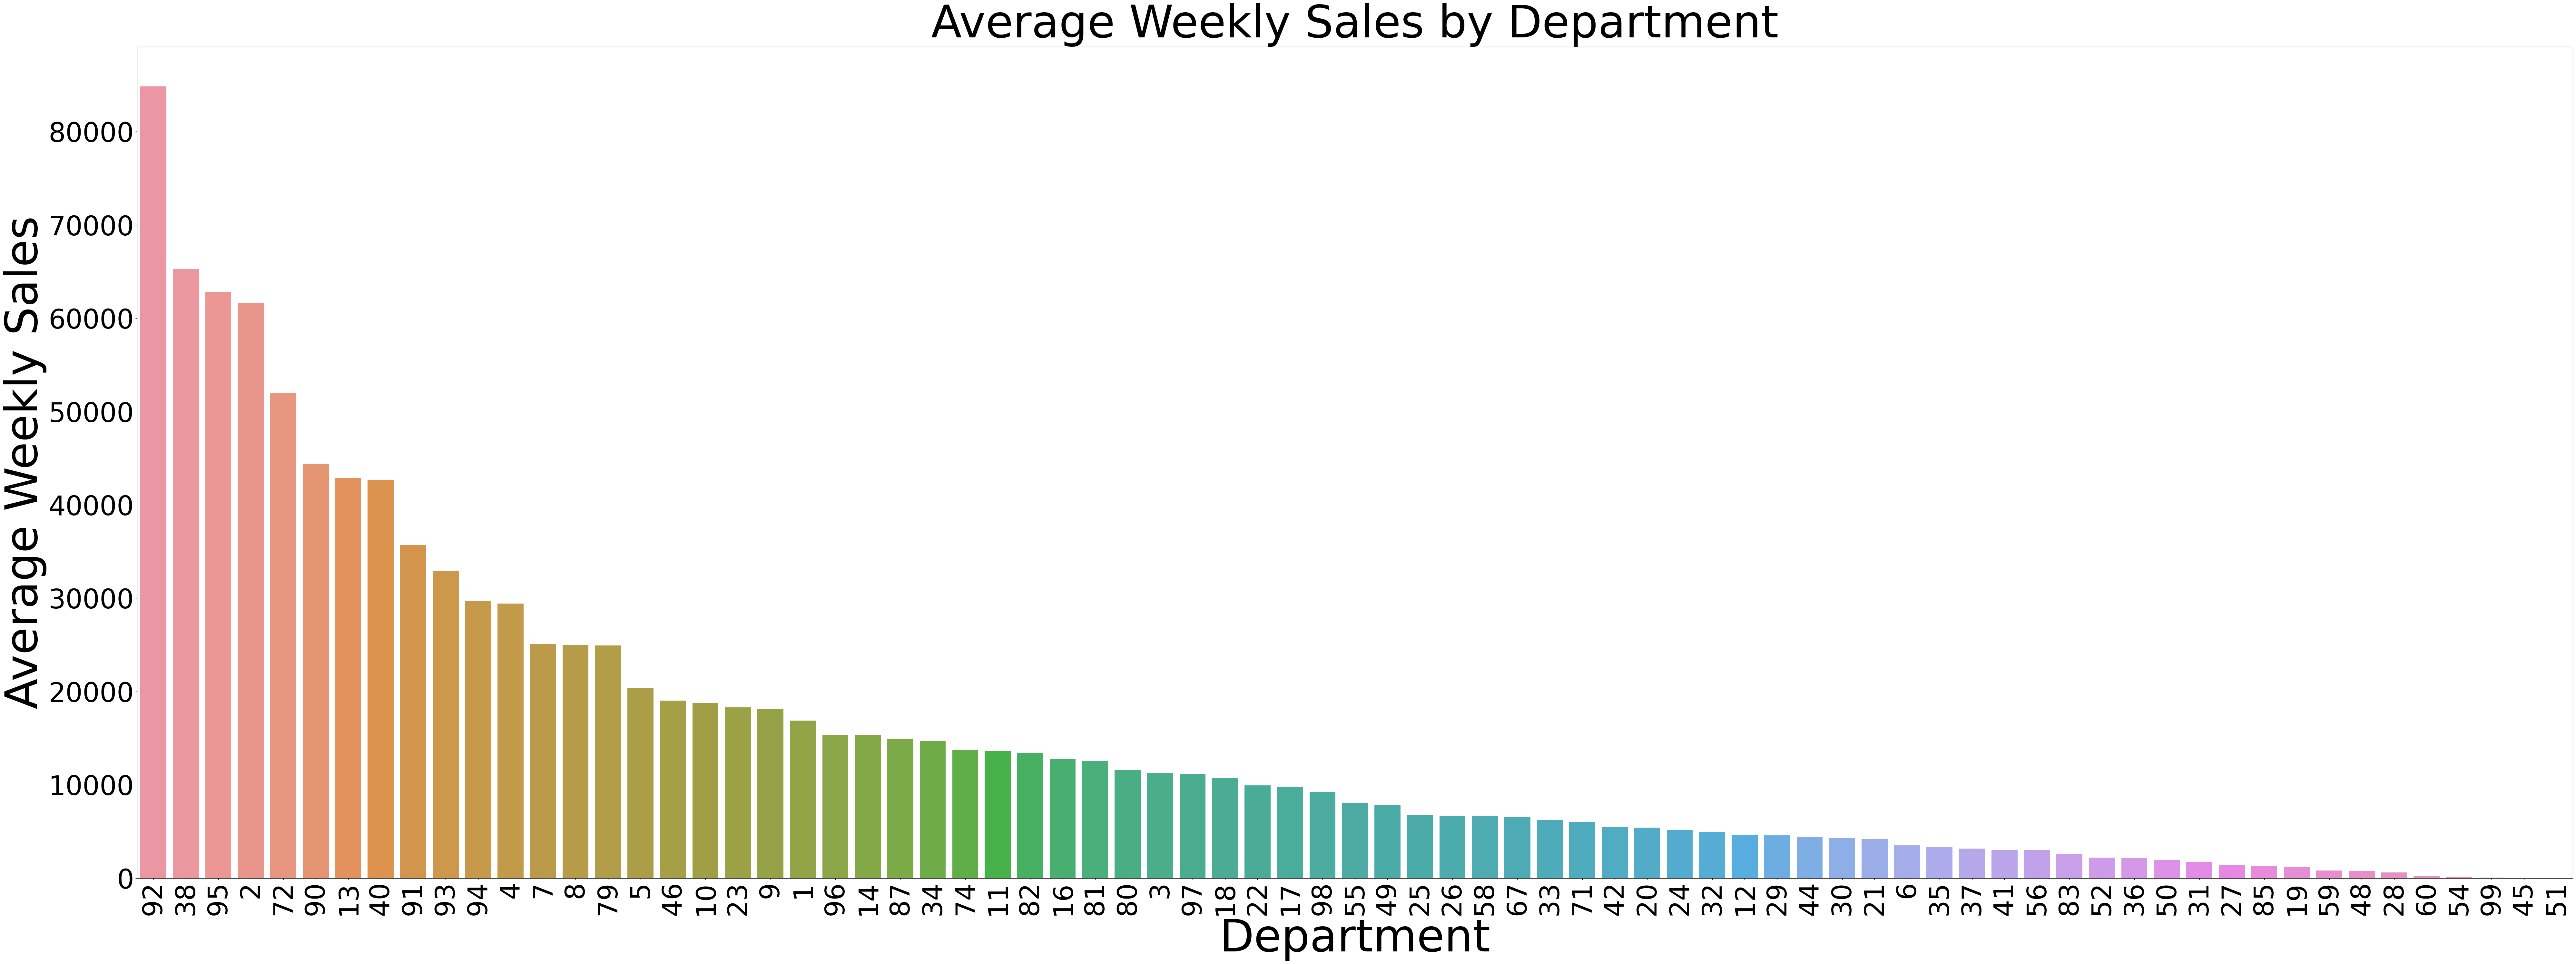

In [56]:
avg_sales_by_store = train_data.sample(1000).groupby(['Dept'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize = (80,30))
sns.barplot(data=avg_sales_by_store, x='Dept', y='Weekly_Sales', order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Dept'])
plt.xlabel('Department', fontsize = 100)
plt.ylabel('Average Weekly Sales', fontsize = 100)
plt.title('Average Weekly Sales by Department', fontsize = 100)
plt.yticks(fontsize=60)
plt.xticks(fontsize=60)
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()